<a href="https://colab.research.google.com/github/evanzs/Dados-da-Pandemia/blob/master/Amostra1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive',force_remount=False)

Mounted at /content/drive


In [ ]:
!pip install -U plotly
!pip install geopandas
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt 
import numpy as np

arquivo_BR_municipios_shapefile = '/content/drive/MyDrive/BR_Municipios/BR_Municipios_2019.shp'

Lendos arquivos ShapeFiles pelo geoPandas 

---
Analisando arquivo GeoDataFrame


In [ ]:
geo_df = gpd.read_file(arquivo_BR_municipios_shapefile)
geo_df

,CD_MUN,NM_MUN,SIGLA_UF,AREA_KM2,geometry
0,1100015,Alta Floresta D'Oeste,RO,7067.025,"POLYGON ((-62.22630 -11.89037, -62.20670 -11.8..."
1,1100023,Ariquemes,RO,4426.571,"POLYGON ((-63.58751 -9.84984, -63.58715 -9.849..."
2,1100031,Cabixi,RO,1314.352,"POLYGON ((-60.71834 -13.39058, -60.70904 -13.3..."
3,1100049,Cacoal,RO,3792.892,"POLYGON ((-61.50114 -11.30119, -61.50104 -11.2..."
4,1100056,Cerejeiras,RO,2783.300,"POLYGON ((-61.51346 -13.28575, -61.51534 -13.2..."
...,...,...,...,...,...
5567,5222005,Vianópolis,GO,954.284,"POLYGON ((-48.53842 -16.75003, -48.54051 -16.7..."
5568,5222054,Vicentinópolis,GO,737.255,"POLYGON ((-49.90713 -17.61460, -49.90588 -17.6..."
5569,5222203,Vila Boa,GO,1060.172,"POLYGON ((-47.07742 -15.06330, -47.07747 -15.0..."
5570,5222302,Vila Propício,GO,2181.583,"POLYGON ((-48.91463 -15.20939, -48.91462 -15.2..."


Lendo arquivo CSV de SRAG 2020 

---
---
1: Algumas Atualizações são feitas até hoje.

2: Arquivo disponibilizado pelo Ministério da Saude (OpenDataSus).

Link: https://opendatasus.saude.gov.br/dataset/bd-srag-2020


In [ ]:
uri = "https://s3-sa-east-1.amazonaws.com/ckan.saude.gov.br/SRAG/2020/INFLUD-21-06-2021.csv"
srag2020 = pd.read_csv(uri,sep=";")

Lendo arquivo CSV de SRAG 2021

---
Link: https://opendatasus.saude.gov.br/dataset/bd-srag-2021



In [ ]:
uri = "https://opendatasus.saude.gov.br/dataset/9f76e80f-a2f1-4662-9e37-71084eae23e3/resource/42bd5e0e-d61a-4359-942e-ebc83391a137/download/influd21-21-06-2021.csv"
srag2021 = pd.read_csv(uri,sep=";")

Aplicando Filtros

---

Filtrando apenas pelas colunas necessárias no estudo e aplicando nos dois dataframes.

In [ ]:
filter = ['EVOLUCAO','CLASSI_FIN','SG_UF','ID_MUNICIP','CS_RACA','CS_SEXO','DT_NOTIFIC',]
srag2020 = srag2020.filter(items=filter)
srag2021 = srag2021.filter(items=filter)

Filtrando Resultados

---
Filtrando nosso dataframe penas pelos resultados que queremos.
Foi feito filtro, restando apenas indices de mortos por covid.

Classificação Final(CLASSI_FIN)  = 5  siginifica que o teste para covid deu positivo

Evolução do Caso(EVOLUCAO) = 2 paciente foi a obito. 


In [ ]:
sgrag2020filtro = srag2020[(srag2020['EVOLUCAO'] == 2) & (srag2020['CLASSI_FIN'] == 5)]
sgrag2021filtro = srag2021[(srag2021['EVOLUCAO'] == 2) & (srag2021['CLASSI_FIN'] == 5)]


In [ ]:
sgrag2021filtro.sort_values(by=['DT_NOTIFIC'],ascending=True)

,EVOLUCAO,CLASSI_FIN,SG_UF,ID_MUNICIP,CS_RACA,CS_SEXO,DT_NOTIFIC
899494,2.0,5.0,CE,FORTALEZA,4,F,01/02/2021
364665,2.0,5.0,AM,MANAUS,4,M,01/02/2021
365724,2.0,5.0,CE,QUIXERAMOBIM,9,M,01/02/2021
17069,2.0,5.0,BA,SALVADOR,4,M,01/02/2021
367392,2.0,5.0,PA,CASTANHAL,4,M,01/02/2021
...,...,...,...,...,...,...,...
523132,2.0,5.0,MG,CURVELO,4,F,31/05/2021
219153,2.0,5.0,SP,SAO PAULO,1,M,31/05/2021
736645,2.0,5.0,SC,MAFRA,1,M,31/05/2021
838419,2.0,5.0,SP,BARRETOS,1,F,31/05/2021


Concatenando dois dataframes de 2020 e 2020

In [ ]:
srag = pd.concat([sgrag2020filtro,sgrag2021filtro])
srag.sort_values(by=['DT_NOTIFIC'],ignore_index=False)

,EVOLUCAO,CLASSI_FIN,SG_UF,ID_MUNICIP,CS_RACA,CS_SEXO,DT_NOTIFIC
887670,2.0,5.0,ES,VITORIA,4.0,M,01/01/2021
1122744,2.0,5.0,SP,SALTO,9.0,F,01/01/2021
793052,2.0,5.0,PR,CURITIBA,4.0,M,01/01/2021
769343,2.0,5.0,SP,SAO BERNARDO DO CAMPO,1.0,F,01/01/2021
1122814,2.0,5.0,SE,ARACAJU,4.0,F,01/01/2021
...,...,...,...,...,...,...,...
467392,2.0,5.0,PA,MARABA,2.0,F,31/12/2020
784161,2.0,5.0,MT,CUIABA,4.0,F,31/12/2020
931119,2.0,5.0,SC,FLORIANOPOLIS,1.0,F,31/12/2020
311388,2.0,5.0,SP,BRAGANCA PAULISTA,1.0,M,31/12/2020


Merge do DataFrame com GeoDataFrame

---
Feito a junção dos dados de SRAG com os dados Geograficos, seguindo como referencia as colunas do nome do municipio.


In [ ]:
geo_df['NM_MUN'] = geo_df['NM_MUN'].str.upper()

sragNacional = geo_df.merge(srag,left_on='NM_MUN',right_on='ID_MUNICIP') 

Agrupamento dos dados

---
Agrupandos os dados segundo a coluna de municios e mantendo as outras colunas, assim teremos o numero absoluto de ocorrência para cada município.


In [ ]:
dfSrag = sragNacional.groupby(['ID_MUNICIP'])\
.agg({'NM_MUN':'first','SIGLA_UF':'first','geometry':'first','CS_RACA':'first','CS_RACA':'first','CS_SEXO':'first','DT_NOTIFIC':'first','ID_MUNICIP':'count',})\
.reset_index(drop=True)
dfSrag

,NM_MUN,SIGLA_UF,geometry,CS_RACA,CS_SEXO,DT_NOTIFIC,ID_MUNICIP
0,ABADIA DOS DOURADOS,MG,"POLYGON ((-47.61843 -18.30777, -47.62127 -18.3...",1.0,F,11/07/2020,5
1,ABAETETUBA,PA,"POLYGON ((-49.13483 -1.68729, -49.13130 -1.684...",4.0,F,05/06/2020,81
2,ABAIARA,CE,"POLYGON ((-39.10138 -7.34337, -39.10175 -7.341...",1.0,F,01/07/2020,4
3,ABEL FIGUEIREDO,PA,"POLYGON ((-48.52422 -5.01698, -48.52462 -5.017...",4.0,M,10/05/2021,4
4,ABELARDO LUZ,SC,"POLYGON ((-52.41878 -26.58662, -52.42002 -26.5...",4.0,M,27/02/2021,7
...,...,...,...,...,...,...,...
1693,VOTUPORANGA,SP,"POLYGON ((-50.03205 -20.42645, -50.03200 -20.4...",1.0,M,14/07/2020,538
1694,WAGNER,BA,"POLYGON ((-41.23478 -12.13879, -41.22915 -12.1...",4.0,M,14/12/2020,2
1695,WENCESLAU BRAZ,MG,"POLYGON ((-45.39018 -22.51281, -45.39017 -22.5...",1.0,M,27/08/2020,10
1696,XAXIM,SC,"POLYGON ((-52.61777 -26.90850, -52.61636 -26.9...",1.0,M,20/05/2020,67


Lendo o arquivo CSV dos municipios representados por pontos no mapa

---



In [ ]:
uri = "https://raw.githubusercontent.com/kelvins/Municipios-Brasileiros/main/csv/municipios.csv"
municipios = pd.read_csv(uri,sep=",")
municipios


,codigo_ibge,nome,latitude,longitude,capital,codigo_uf
0,5200050,Abadia de Goiás,-16.75730,-49.4412,0,52
1,3100104,Abadia dos Dourados,-18.48310,-47.3916,0,31
2,5200100,Abadiânia,-16.19700,-48.7057,0,52
3,3100203,Abaeté,-19.15510,-45.4444,0,31
4,1500107,Abaetetuba,-1.72183,-48.8788,0,15
...,...,...,...,...,...,...
5565,2933604,Xique-Xique,-10.82300,-42.7245,0,29
5566,2517407,Zabelê,-8.07901,-37.1057,0,25
5567,3557154,Zacarias,-21.05060,-50.0552,0,35
5568,2114007,Zé Doca,-3.27014,-45.6553,0,21


Merge dos DataFrames

---
Juntando mais um dado geografica, dessa vez de POINT aos dados de SRAGS,relacionando por municipios.



In [ ]:
municipios['nome'] = municipios['nome'].str.upper()
dfSrag = dfSrag.merge(municipios,left_on='NM_MUN',right_on='nome') 

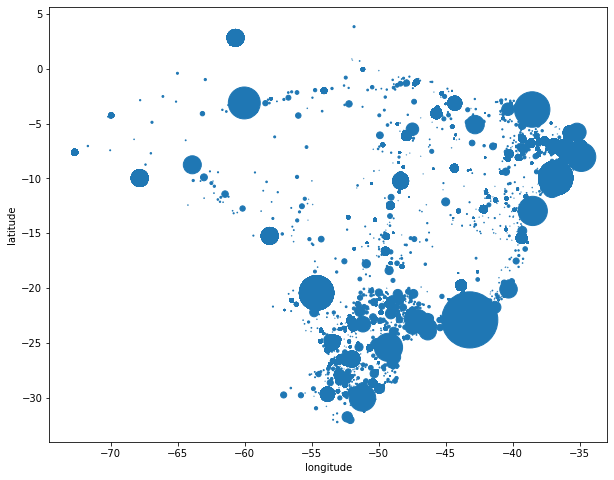

In [ ]:
dfSrag.plot.scatter(y='latitude',x='longitude',cmap='RdYlGn',marker='o',s=dfSrag['ID_MUNICIP']/10,figsize=(10,8))

Merge IDH  2010 - BRASIL

---
http://www.atlasbrasil.org.br/acervo/biblioteca

IDHM - composto pelas mesmas três dimensões do IDH Global – longevidade, educação e renda, esses indicadores levados em conta no IDHM são mais adequados para avaliar o desenvolvimento dos municípios e regiões metropolitanas brasileiras. 

IDH_E  - Índice que avalia a Educação.
IDHM_L - Índice que avalia a Longevidade.
IDHM_R - Índice que avalia a Renda



In [ ]:
uri = "/content/drive/MyDrive/IDM-BRasil.csv"
idhm = pd.read_csv(uri,sep=";",encoding='ISO-8859-1', decimal=',')
filter = ['Município','IDHM','IDHM_E','IDHM_L','IDHM_R']
idhm = idhm.filter(items=filter)
idhm

,Município,IDHM,IDHM_E,IDHM_L,IDHM_R
0,ALTA FLORESTA D'OESTE,0.641,0.526,0.763,0.657
1,ARIQUEMES,0.702,0.600,0.806,0.716
2,CABIXI,0.650,0.559,0.757,0.650
3,CACOAL,0.718,0.620,0.821,0.727
4,CEREJEIRAS,0.692,0.602,0.799,0.688
...,...,...,...,...,...
5560,VIANÓPOLIS,0.712,0.622,0.818,0.710
5561,VICENTINÓPOLIS,0.684,0.562,0.804,0.707
5562,VILA BOA,0.647,0.534,0.818,0.619
5563,VILA PROPÍCIO,0.634,0.505,0.802,0.629


Merge com IDHM

---



In [ ]:
df = dfSrag.merge(idhm,left_on='NM_MUN',right_on='Município')
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 762806 entries, 0 to 762805
Data columns (total 48 columns):
 #   Column       Non-Null Count   Dtype   
---  ------       --------------   -----   
 0   NM_MUN       762806 non-null  object  
 1   SIGLA_UF     762806 non-null  object  
 2   geometry     762806 non-null  geometry
 3   CS_RACA      762802 non-null  float64 
 4   CS_SEXO      762806 non-null  object  
 5   DT_NOTIFIC   762806 non-null  object  
 6   ID_MUNICIP   762806 non-null  int64   
 7   Município_x  762806 non-null  object  
 8   IDHM_x       762806 non-null  float64 
 9   IDHM_E_x     762806 non-null  float64 
 10  IDHM_L_x     762806 non-null  float64 
 11  IDHM_R_x     762806 non-null  float64 
 12  Município_y  762806 non-null  object  
 13  IDHM_y       762806 non-null  float64 
 14  IDHM_E_y     762806 non-null  float64 
 15  IDHM_L_y     762806 non-null  float64 
 16  IDHM_R_y     762806 non-null  float64 
 17  Município_x  762806 non-null  object  
 18  IDHM

IDHM  VS MORTALIDADE

---
Comparando os 4 dados de IDHM com o resultados de morte por cidade.


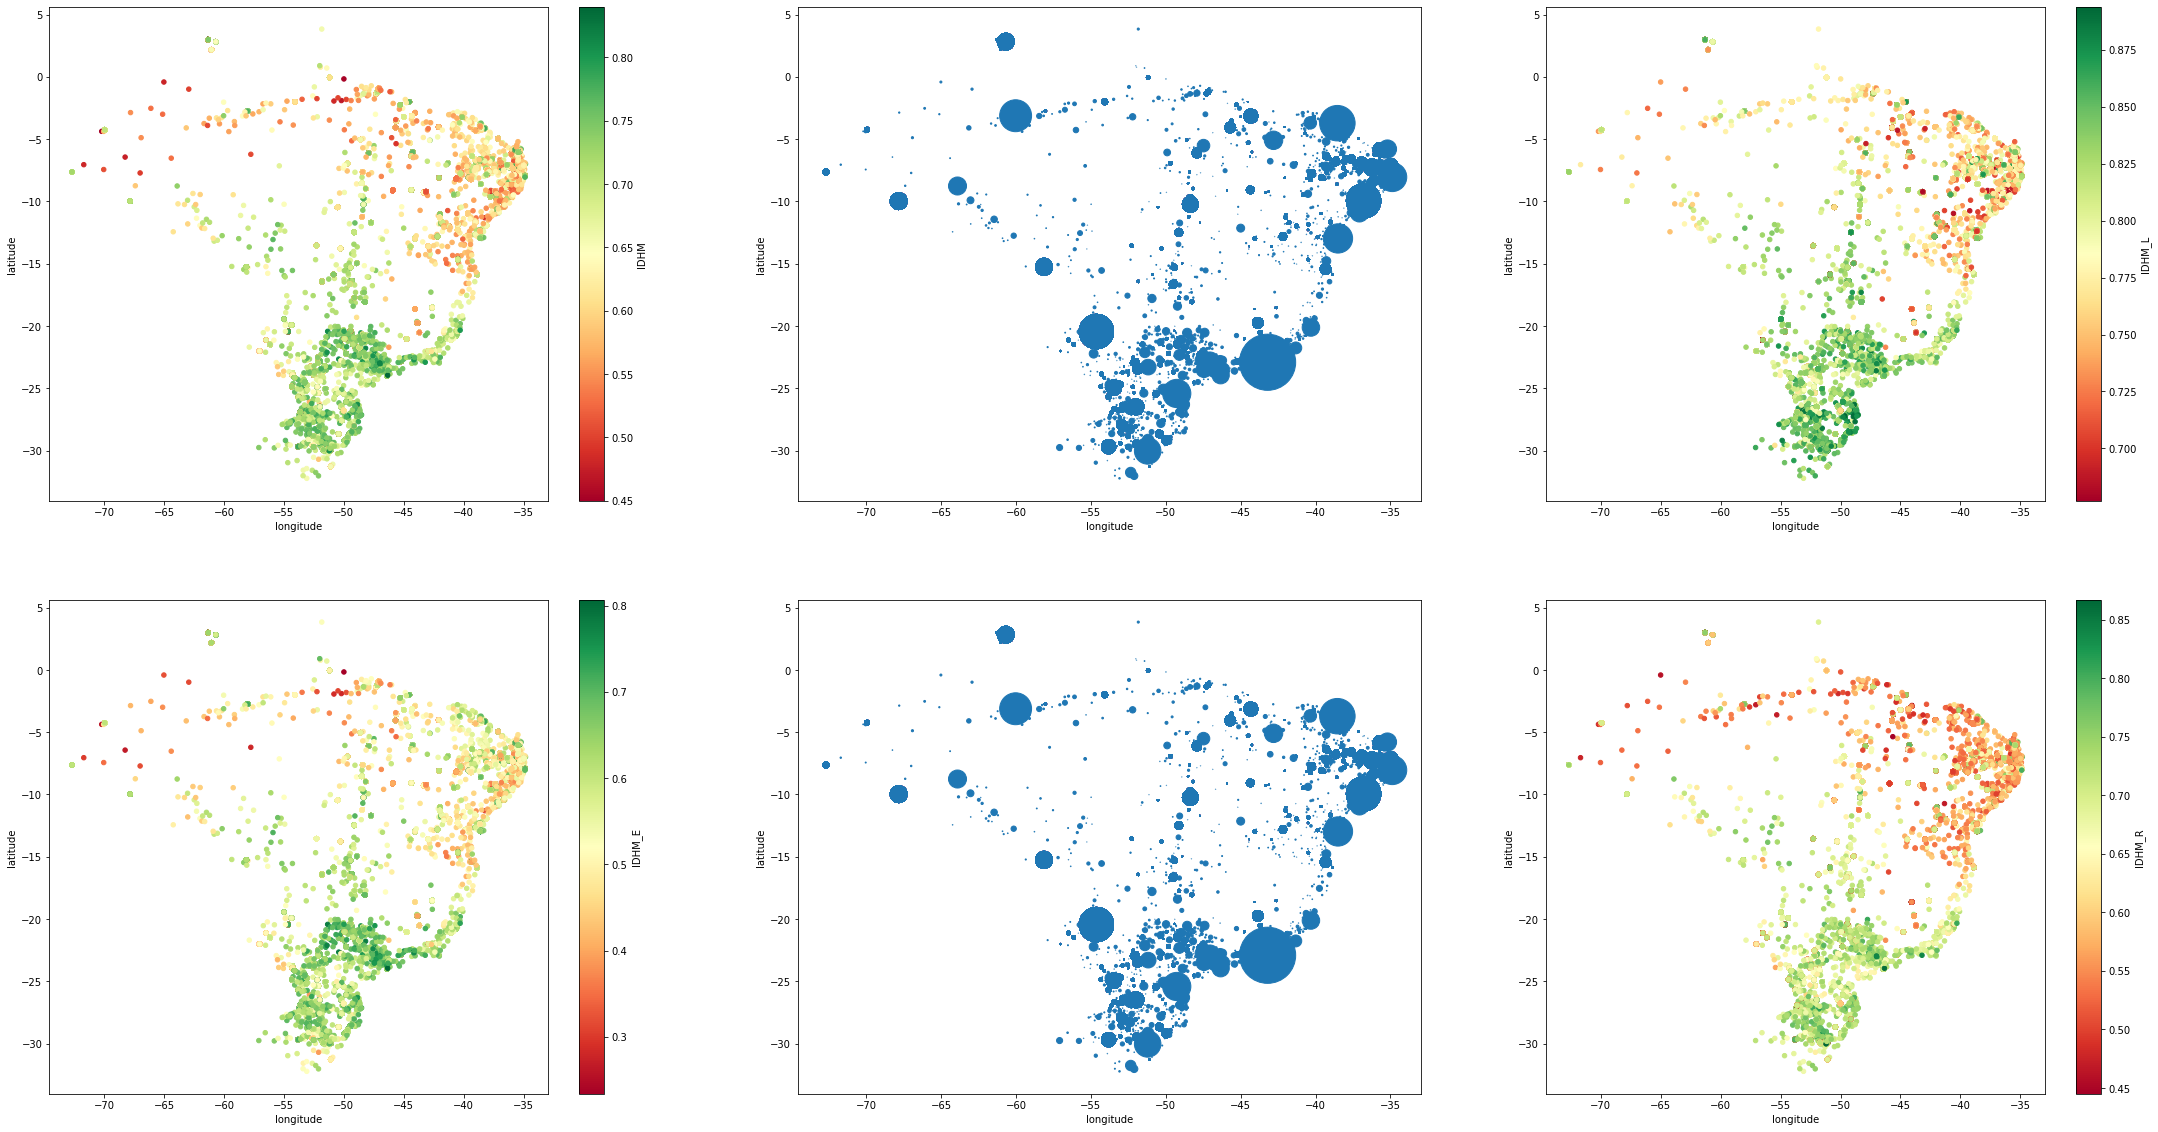

In [ ]:
fig, ax = plt.subplots(2,3,figsize=(38,20))

df.plot.scatter(y='latitude',x='longitude',cmap='RdYlGn',c='IDHM',ax=ax[0,0])
df.plot.scatter(y='latitude',x='longitude',cmap='RdYlGn',marker='o',s=df['ID_MUNICIP']/10,ax=ax[0,1])
df.plot.scatter(y='latitude',x='longitude',c='IDHM_L',cmap='RdYlGn',ax=ax[0,2])
df.plot.scatter(y='latitude',x='longitude',c='IDHM_E',cmap='RdYlGn',ax=ax[1,0])
df.plot.scatter(y='latitude',x='longitude',cmap='RdYlGn',marker='o',s=df['ID_MUNICIP']/10,ax=ax[1,1])
df.plot.scatter(y='latitude',x='longitude',c='IDHM_R',cmap='RdYlGn',ax=ax[1,2])


**DIVIDINDO OCORRENCIAS POR ESTADOS**

---




SP

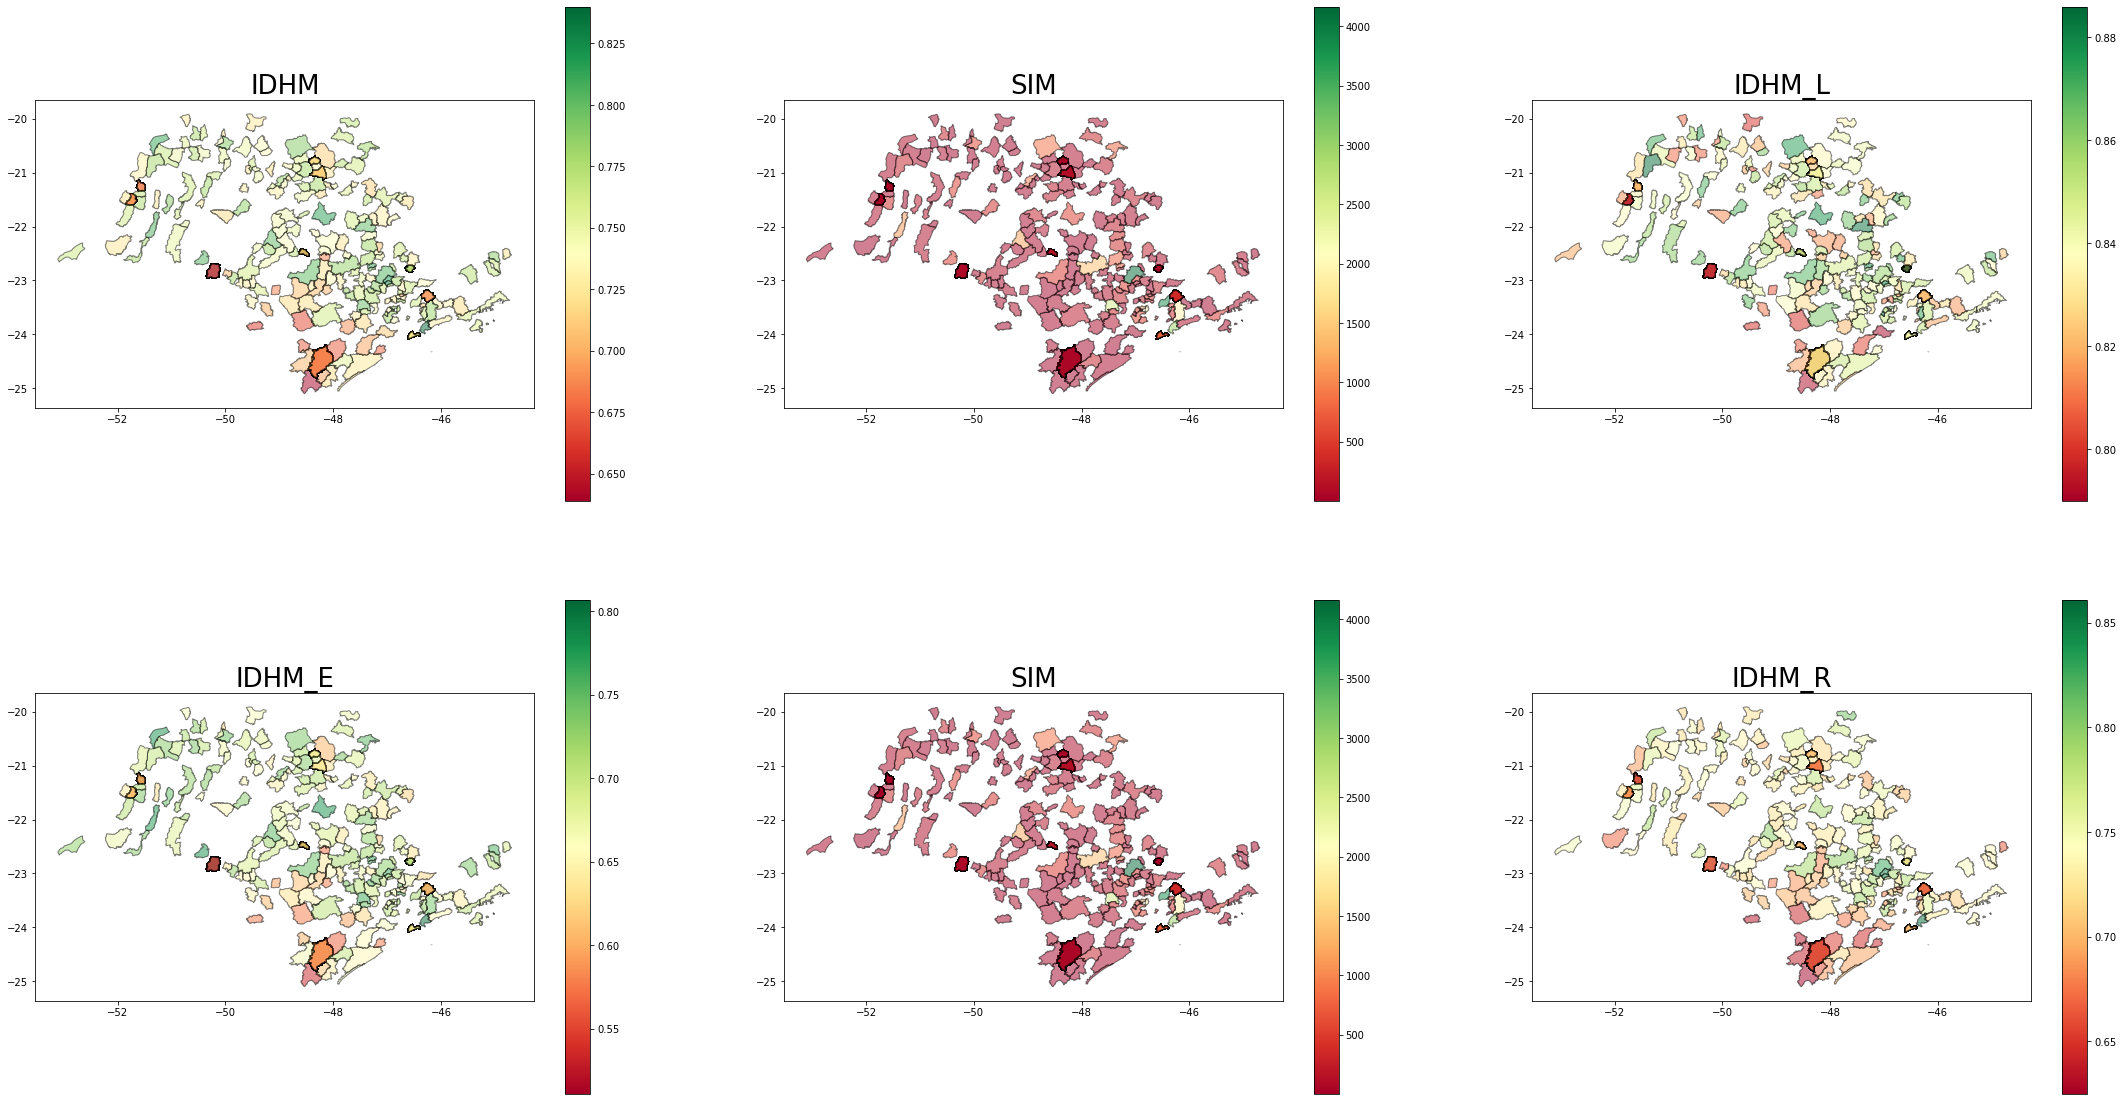

In [ ]:
dfSragSP = df[df['SIGLA_UF'] == 'SP']
dfSragSP = gpd.GeoDataFrame(dfSragSP)
fig, ax = plt.subplots(2,3,figsize=(38,20))

ax[0,0].set_title('IDHM', color='black', size=26)
ax[0,1].set_title('SIM', color='black', size=26)
ax[0,2].set_title('IDHM_L', color='black', size=26)
ax[1,0].set_title('IDHM_E', color='black', size=26)
ax[1,1].set_title('SIM', color='black', size=26)
ax[1,2].set_title('IDHM_R', color='black', size=26)

dfSragSP.plot(column='IDHM',cmap='RdYlGn',edgecolor='black',legend=True,alpha=.5,ax=ax[0,0])
dfSragSP.plot(column='ID_MUNICIP',cmap='RdYlGn',edgecolor='black',legend=True,alpha=.5,ax=ax[0,1])
dfSragSP.plot(column='IDHM_L',cmap='RdYlGn',edgecolor='black',legend=True,alpha=.5,ax=ax[0,2])
dfSragSP.plot(column='IDHM_E',cmap='RdYlGn',edgecolor='black',legend=True,alpha=.5,ax=ax[1,0])
dfSragSP.plot(column='ID_MUNICIP',cmap='RdYlGn',edgecolor='black',legend=True,alpha=.5,ax=ax[1,1])
dfSragSP.plot(column='IDHM_R',cmap='RdYlGn',edgecolor='black',legend=True,alpha=.5,ax=ax[1,2])

**RS**

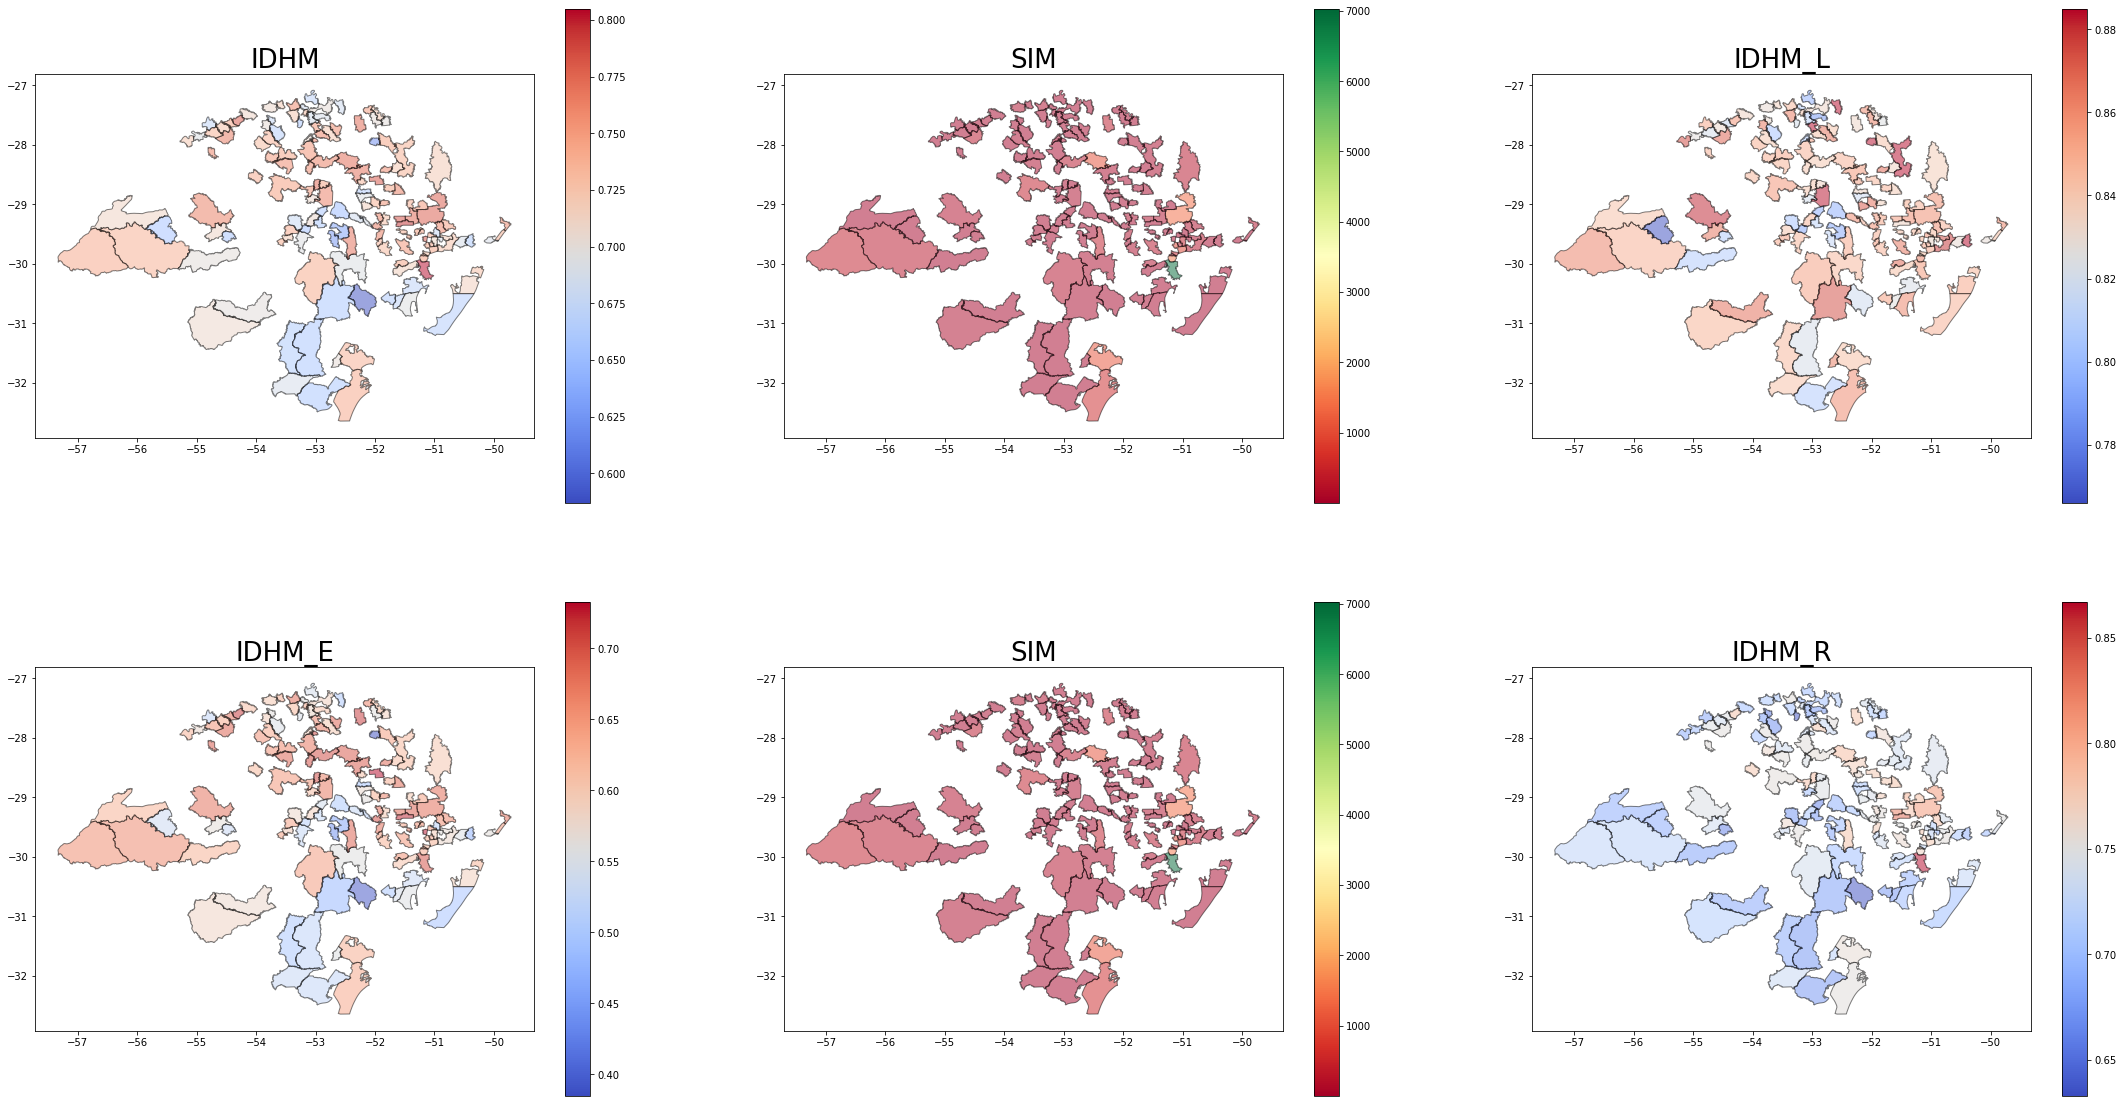

In [ ]:
dfSragRS = df[df['SIGLA_UF'] == 'RS']
dfSragRS = gpd.GeoDataFrame(dfSragRS)

fig, ax = plt.subplots(2,3,figsize=(38,20))

ax[0,0].set_title('IDHM', color='black', size=26)
ax[0,1].set_title('SIM', color='black', size=26)
ax[0,2].set_title('IDHM_L', color='black', size=26)
ax[1,0].set_title('IDHM_E', color='black', size=26)
ax[1,1].set_title('SIM', color='black', size=26)
ax[1,2].set_title('IDHM_R', color='black', size=26)

dfSragRS.plot(column='IDHM',cmap='coolwarm',edgecolor='black',legend=True,alpha=.5,ax=ax[0,0])
dfSragRS.plot(column='ID_MUNICIP',cmap='RdYlGn',edgecolor='black',legend=True,alpha=.5,ax=ax[0,1])
dfSragRS.plot(column='IDHM_L',cmap='coolwarm',edgecolor='black',legend=True,alpha=.5,ax=ax[0,2])
dfSragRS.plot(column='IDHM_E',cmap='coolwarm',edgecolor='black',legend=True,alpha=.5,ax=ax[1,0])
dfSragRS.plot(column='ID_MUNICIP',cmap='RdYlGn',edgecolor='black',legend=True,alpha=.5,ax=ax[1,1])
dfSragRS.plot(column='IDHM_R',cmap='coolwarm',edgecolor='black',legend=True,alpha=.5,ax=ax[1,2])


**RJ**

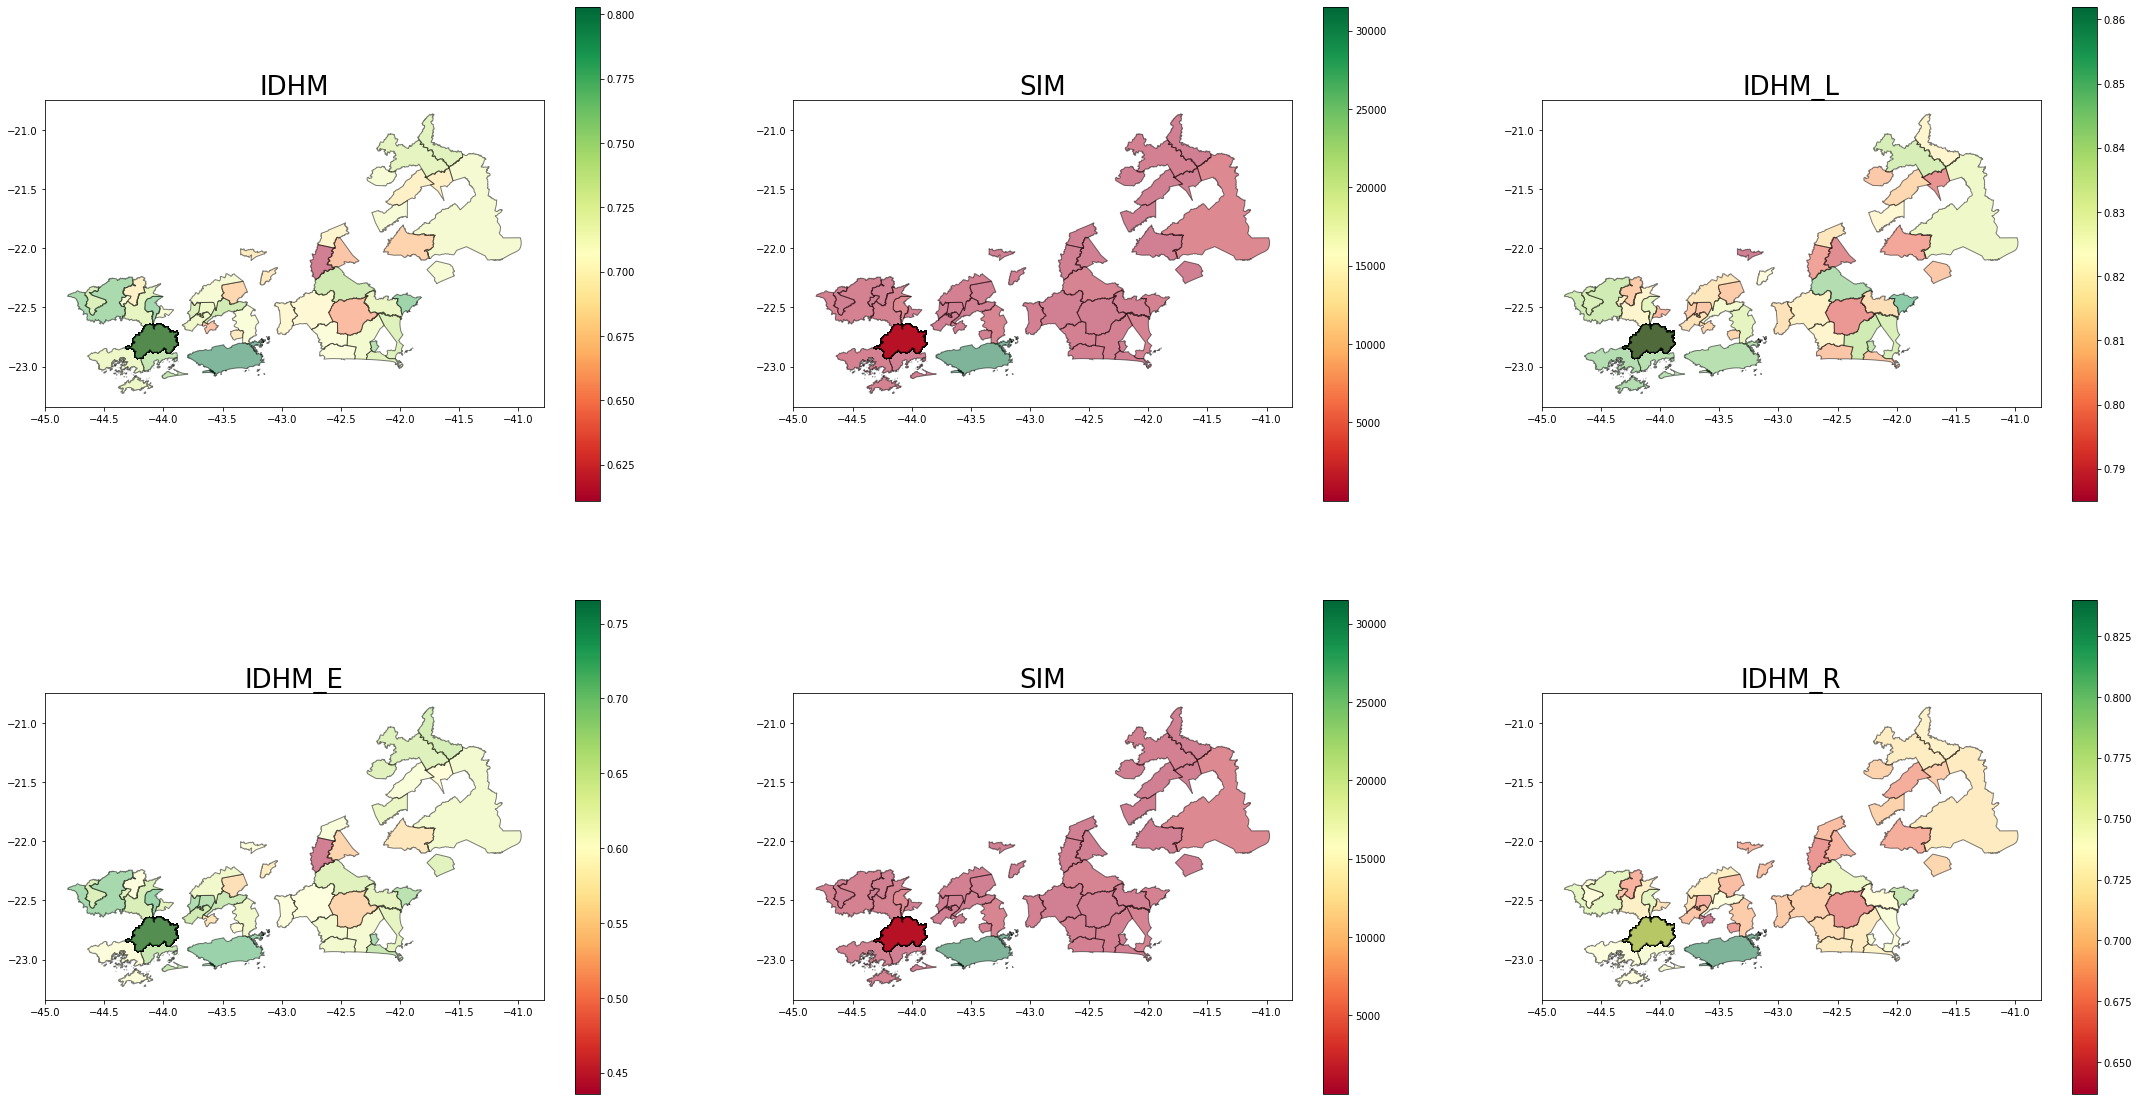

In [ ]:
dfSragRJ = df[df['SIGLA_UF'] == 'RJ']
dfSragRJ = gpd.GeoDataFrame(dfSragRJ)

fig, ax = plt.subplots(2,3,figsize=(38,20))

ax[0,0].set_title('IDHM', color='black', size=26)
ax[0,1].set_title('SIM', color='black', size=26)
ax[0,2].set_title('IDHM_L', color='black', size=26)
ax[1,0].set_title('IDHM_E', color='black', size=26)
ax[1,1].set_title('SIM', color='black', size=26)
ax[1,2].set_title('IDHM_R', color='black', size=26)

dfSragRJ.plot(column='IDHM',cmap='RdYlGn',edgecolor='black',legend=True,alpha=.5,ax=ax[0,0])
dfSragRJ.plot(column='ID_MUNICIP',cmap='RdYlGn',edgecolor='black',legend=True,alpha=.5,ax=ax[0,1])
dfSragRJ.plot(column='IDHM_L',cmap='RdYlGn',edgecolor='black',legend=True,alpha=.5,ax=ax[0,2])
dfSragRJ.plot(column='IDHM_E',cmap='RdYlGn',edgecolor='black',legend=True,alpha=.5,ax=ax[1,0])
dfSragRJ.plot(column='ID_MUNICIP',cmap='RdYlGn',edgecolor='black',legend=True,alpha=.5,ax=ax[1,1])
dfSragRJ.plot(column='IDHM_R',cmap='RdYlGn',edgecolor='black',legend=True,alpha=.5,ax=ax[1,2])


**MS**

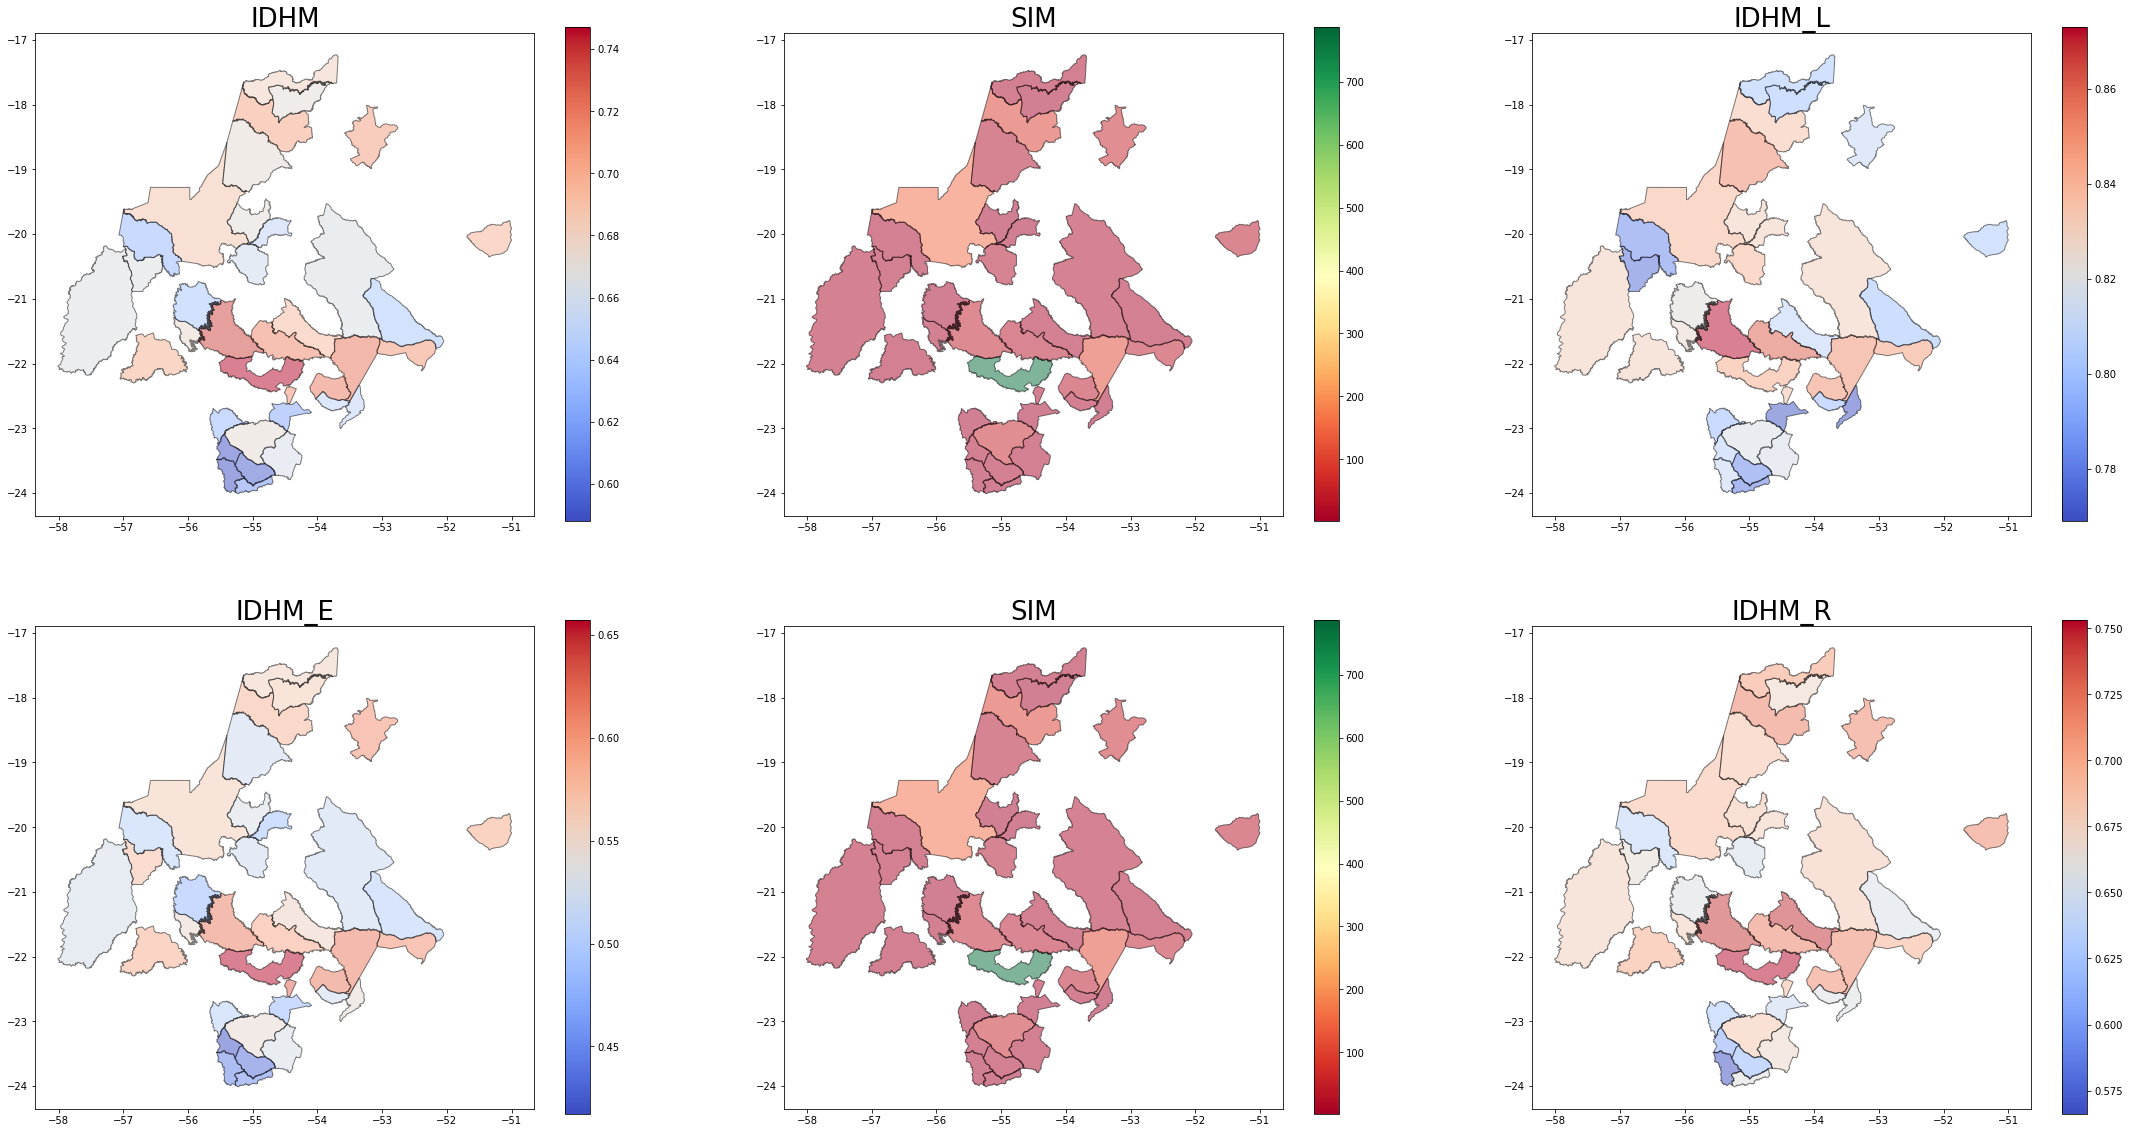

In [ ]:
dfSragMS = df[df['SIGLA_UF'] == 'MS']
dfSragMS = gpd.GeoDataFrame(dfSragMS)

fig, ax = plt.subplots(2,3,figsize=(38,20))

ax[0,0].set_title('IDHM', color='black', size=26)
ax[0,1].set_title('SIM', color='black', size=26)
ax[0,2].set_title('IDHM_L', color='black', size=26)
ax[1,0].set_title('IDHM_E', color='black', size=26)
ax[1,1].set_title('SIM', color='black', size=26)
ax[1,2].set_title('IDHM_R', color='black', size=26)

dfSragMS.plot(column='IDHM',cmap='coolwarm',edgecolor='black',legend=True,alpha=.5,ax=ax[0,0])
dfSragMS.plot(column='ID_MUNICIP',cmap='RdYlGn',edgecolor='black',legend=True,alpha=.5,ax=ax[0,1])
dfSragMS.plot(column='IDHM_L',cmap='coolwarm',edgecolor='black',legend=True,alpha=.5,ax=ax[0,2])
dfSragMS.plot(column='IDHM_E',cmap='coolwarm',edgecolor='black',legend=True,alpha=.5,ax=ax[1,0])
dfSragMS.plot(column='ID_MUNICIP',cmap='RdYlGn',edgecolor='black',legend=True,alpha=.5,ax=ax[1,1])
dfSragMS.plot(column='IDHM_R',cmap='coolwarm',edgecolor='black',legend=True,alpha=.5,ax=ax[1,2])

**MT**

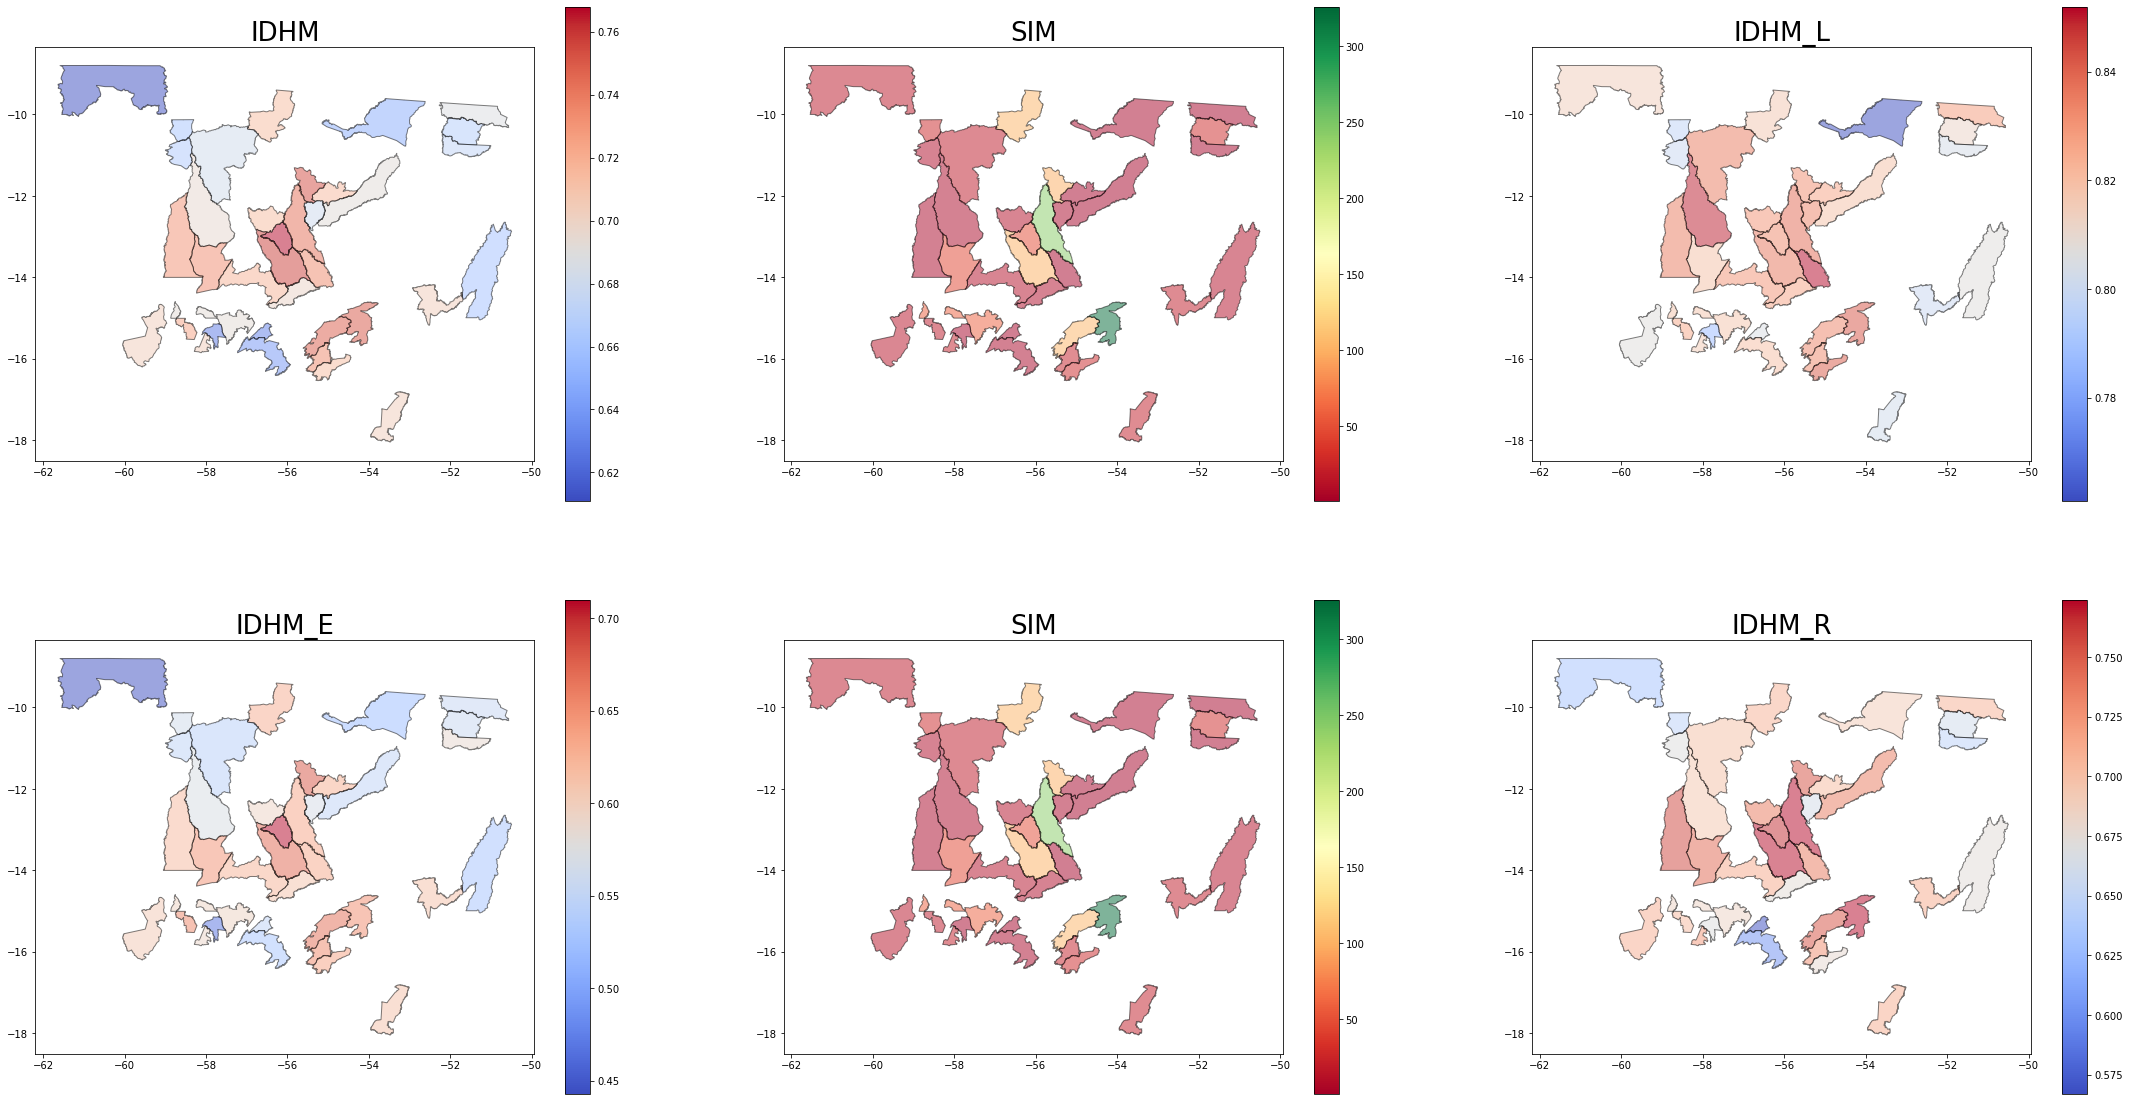

In [ ]:
dfSragMT = df[df['SIGLA_UF'] == 'MT']
dfSragMT = gpd.GeoDataFrame(dfSragMT)

fig, ax = plt.subplots(2,3,figsize=(38,20))

ax[0,0].set_title('IDHM', color='black', size=26)
ax[0,1].set_title('SIM', color='black', size=26)
ax[0,2].set_title('IDHM_L', color='black', size=26)
ax[1,0].set_title('IDHM_E', color='black', size=26)
ax[1,1].set_title('SIM', color='black', size=26)
ax[1,2].set_title('IDHM_R', color='black', size=26)

dfSragMT.plot(column='IDHM',cmap='coolwarm',edgecolor='black',legend=True,alpha=.5,ax=ax[0,0])
dfSragMT.plot(column='ID_MUNICIP',cmap='RdYlGn',edgecolor='black',legend=True,alpha=.5,ax=ax[0,1])
dfSragMT.plot(column='IDHM_L',cmap='coolwarm',edgecolor='black',legend=True,alpha=.5,ax=ax[0,2])
dfSragMT.plot(column='IDHM_E',cmap='coolwarm',edgecolor='black',legend=True,alpha=.5,ax=ax[1,0])
dfSragMT.plot(column='ID_MUNICIP',cmap='RdYlGn',edgecolor='black',legend=True,alpha=.5,ax=ax[1,1])
dfSragMT.plot(column='IDHM_R',cmap='coolwarm',edgecolor='black',legend=True,alpha=.5,ax=ax[1,2])

**CAMPINAS**

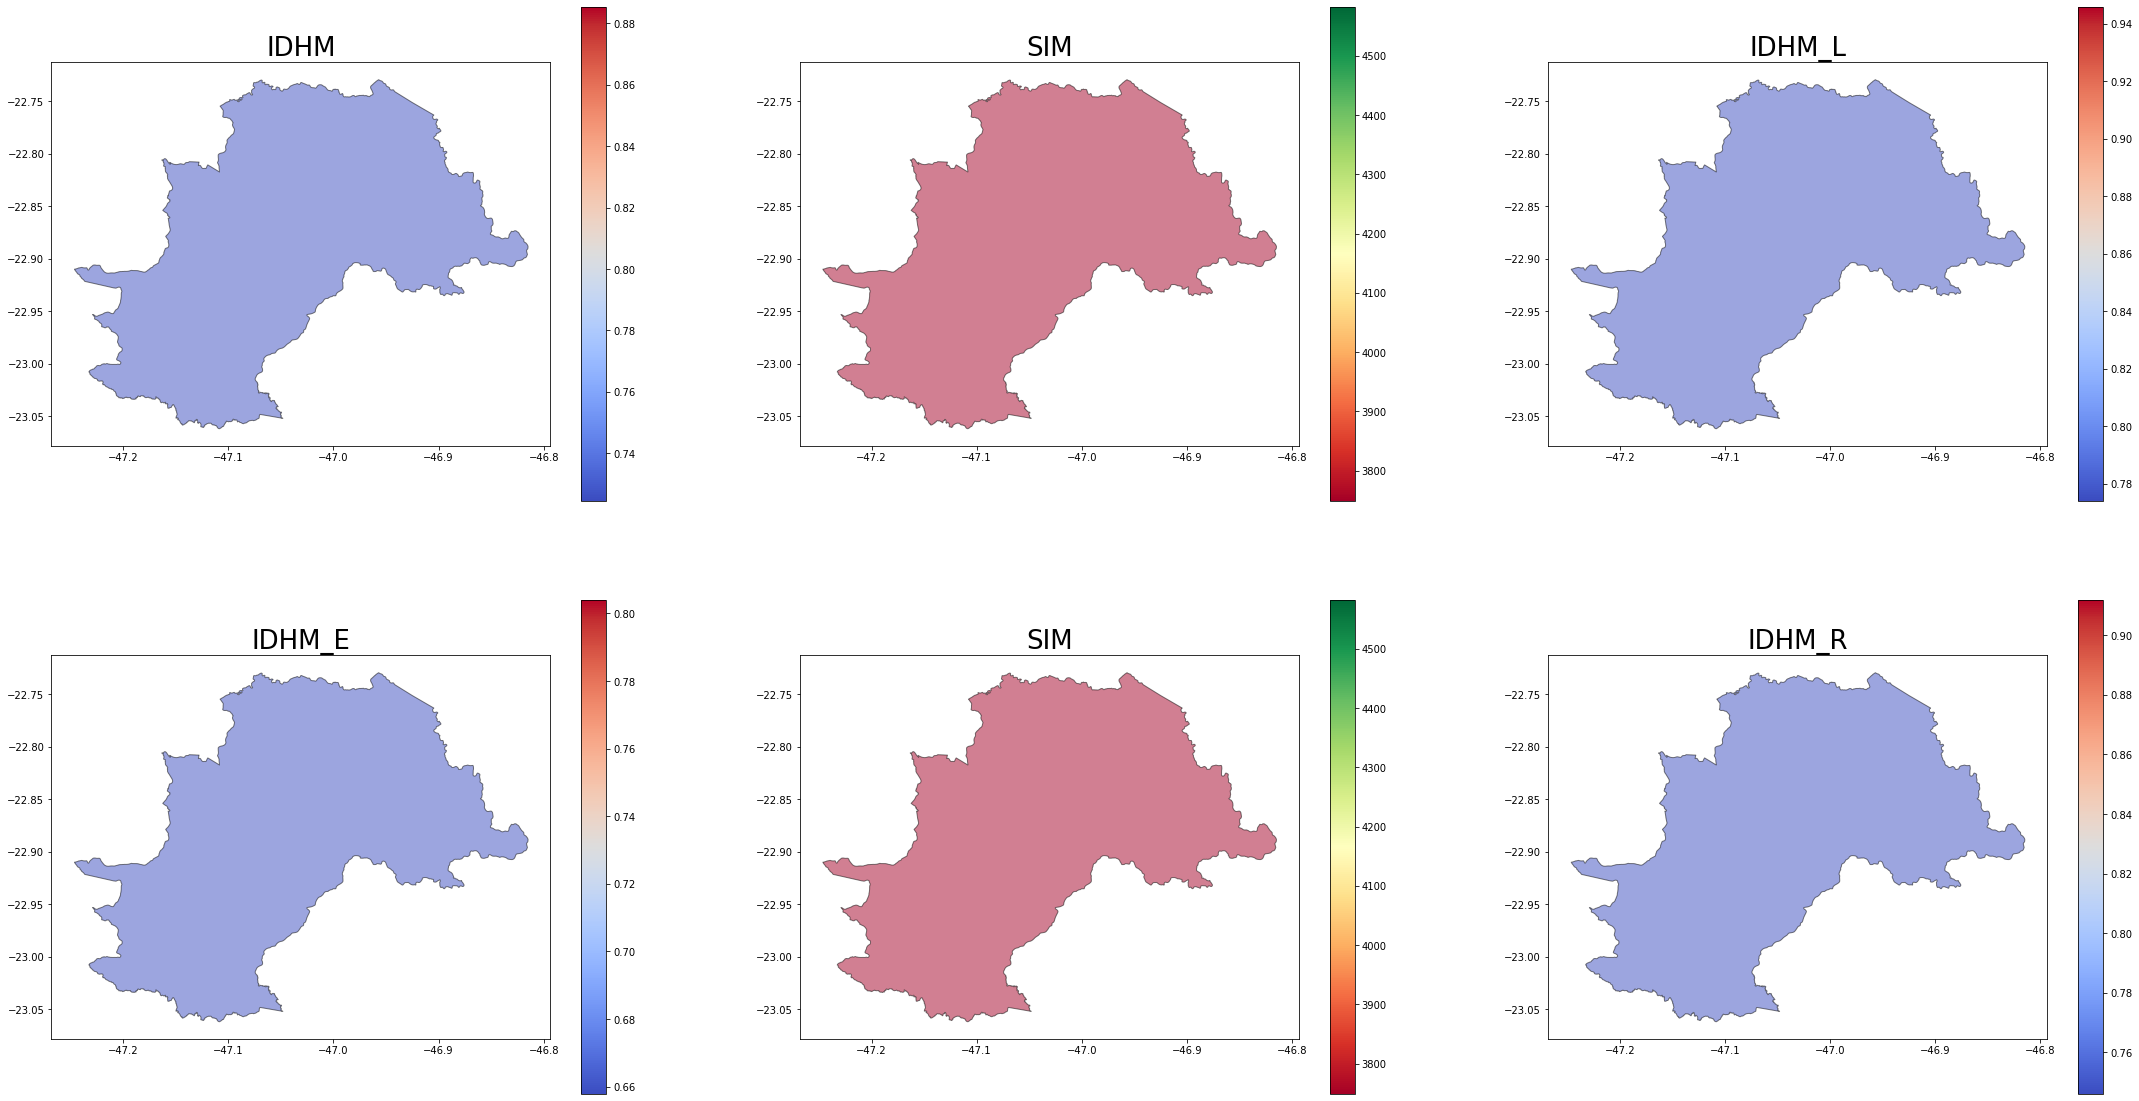

In [ ]:
dfSragCAMP = df[df['Município'] == 'CAMPINAS']
dfSragCAMP = gpd.GeoDataFrame(dfSragCAMP)

fig, ax = plt.subplots(2,3,figsize=(38,20))

ax[0,0].set_title('IDHM', color='black', size=26)
ax[0,1].set_title('SIM', color='black', size=26)
ax[0,2].set_title('IDHM_L', color='black', size=26)
ax[1,0].set_title('IDHM_E', color='black', size=26)
ax[1,1].set_title('SIM', color='black', size=26)
ax[1,2].set_title('IDHM_R', color='black', size=26)

dfSragCAMP.plot(column='IDHM',cmap='coolwarm',edgecolor='black',legend=True,alpha=.5,ax=ax[0,0])
dfSragCAMP.plot(column='ID_MUNICIP',cmap='RdYlGn',edgecolor='black',legend=True,alpha=.5,ax=ax[0,1])
dfSragCAMP.plot(column='IDHM_L',cmap='coolwarm',edgecolor='black',legend=True,alpha=.5,ax=ax[0,2])
dfSragCAMP.plot(column='IDHM_E',cmap='coolwarm',edgecolor='black',legend=True,alpha=.5,ax=ax[1,0])
dfSragCAMP.plot(column='ID_MUNICIP',cmap='RdYlGn',edgecolor='black',legend=True,alpha=.5,ax=ax[1,1])
dfSragCAMP.plot(column='IDHM_R',cmap='coolwarm',edgecolor='black',legend=True,alpha=.5,ax=ax[1,2])

ANALISE DOS DADOS POR DISTRITO DE SP

---
Dados disponibilizados pelo Estado de São Paulo

link: https://www.saopaulo.sp.gov.br/planosp/simi/dados-abertos

Dados disponibilado pelo Atlas Humano 

Bases do Censo e das UDHs por Regiões Metropolitanas

link: http://www.atlasbrasil.org.br/acervo/biblioteca


**Dados de IDH por Regiões de SP**

---
Nota: a Base de dado original é bem maior, contendo índices de 2000 e 2010, nesse caso ele foi editado para ficar menor e o nome das regiões foram tratadas para dar match com dos dados de SP. 
